# Optimizers Tensorflow

# Simple Demo 1D SGD with animation

/tmp/ipykernel_1552/420900260.py:53: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  p2, = ax.plot([], [],  'r.', marker='.', alpha=.5)
/tmp/ipykernel_1552/420900260.py:55: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "r." (-> marker='.'). The keyword argument will take precedence.
  p3, = ax.plot([], [],  'r.', marker='.', alpha=.5, ms=10)
MovieWriter imagemagick unavailable; using Pillow instead.


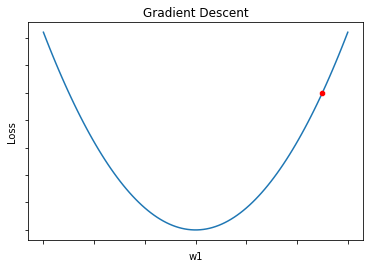

In [3]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc
%matplotlib widget
%matplotlib notebook
%matplotlib inline



def animate_optimizer(frame, opt, loss, lossf, x_sgd, x_cord_list, p2, p3):
    step_count = opt.minimize(loss, var_list=[x_sgd]).numpy()
    p3.set_data(x_sgd.numpy(), lossf(x_sgd.numpy()))
    x_cord_list.append(x_sgd.numpy() )
    loss_y = [lossf(xt) for xt in x_cord_list]
    p2.set_data(x_cord_list, loss_y)
    return p2, p3, x_sgd,



opt = tf.keras.optimizers.SGD(learning_rate=0.1)


lossf = lambda x: (x ** 2)/2.0     

x=list(np.linspace(-6, 6.0, 100))
y = []
for x_cord_list in x:
    y.append(lossf(x_cord_list))

x_cord_list = []

plt.clf
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.set_xlabel('w1')
ax.set_ylabel('Loss')
ax.set_title('Gradient Descent')

## 1d 1single weight loss plot

x_sgd = tf.Variable(5.0)
p1, = ax.plot([x_sgd], [lossf(x_sgd)], 'k')
p2, = ax.plot([], [], color='red', alpha=0.6)
p2, = ax.plot([], [],  'r.', marker='.', alpha=.5)

p3, = ax.plot([], [],  'r.', marker='.', alpha=.5, ms=10)
max_iter = 100
loss = lambda: (x_sgd ** 2)/2.0      


anim2 = animation.FuncAnimation(fig, animate_optimizer, 
                                frames=range(0, max_iter),  fargs = (opt, loss, lossf, x_sgd, x_cord_list, p2, p3), interval=50,repeat=True, repeat_delay=20)
filename = 'sgd_1d_intro.gif'

anim2
anim2.save(filename, dpi=80, writer='imagemagick', fps=5)







# Optimizers Graph Generation - Loops on optimizers list, and generates 3d animations with various elevations, and 2D contour animation per each optimizer. All outputs are saved to gif files.

In [1]:
# Optimizers Graph Generation - Loops on aoptimizers list, and generate 3d animations with various elevations and 2D contour animation per each optimizer
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc
import mpl_toolkits.mplot3d.axes3d as p3
# from mpl_toolkits.mplot3d import axes3d, Axes3D #<-- Note the capitalization! 

%matplotlib widget
%matplotlib notebook

####### #3D anaimate and contour plot

def animate_optimizer_3d(frame, opt, loss_func, loss_func_args, x_cord, y_cord, x_cord_list, yy, zz, ax, p2, p3):  
    step_count = opt.minimize(loss_func, var_list=[y_cord, x_cord]).numpy()
    ax.title.set_text('3D Plot, Frame={}'.format(frame))
    p3.set_data(x_cord.numpy(), y_cord.numpy())
    p3.set_3d_properties(loss_func_args(x_cord.numpy(), y_cord.numpy())) 
    p2.set_data(np.array(x_cord_list), np.array(yy))
    p2.set_3d_properties(np.array(zz)) 
    x_cord_list.append(x_cord.numpy())
    yy.append(y_cord.numpy())
    zz.append(loss_func_args(x_cord.numpy(), y_cord.numpy())) 
    return p3, x_cord, y_cord


def plot_loss_func_3d(loss_func_args):
    x_cord_list = np.linspace(-5.5, 5.5, 100)
    yy = np.linspace(-5.5, 5.5, 100)
    X, Y = np.meshgrid(x_cord_list, yy)
    Z = loss_func_args(X, Y)
    fig1 = plt.figure(figsize=(16, 6))
    fig1.set_figheight(10)
    fig1.set_figwidth(10)
    ax1 = plt.axes(projection='3d')
    surf = ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.3, 
                           linewidth=0, antialiased=False)
    ax1.set_xlabel('w1', fontsize=20)
    ax1.set_ylabel('w2', fontsize=20)
    ax1.set_zlabel('J(w1, w2)', fontsize=20)
    ax1.xaxis.set_ticklabels([])
    ax1.yaxis.set_ticklabels([])
    ax1.zaxis.set_ticklabels([])
    return fig1, ax1


####### #3D anaimate and contour plot

def animate_contour_2d(frame, opt, loss_func, 
                       loss_func_args, 
                       x_cord, y_cord, x_cord_list, yy, ax, 
                       p2, p3):   

    step_count = opt.minimize(loss_func, var_list=[y_cord, x_cord]).numpy()
    ax.title.set_text('2D Contour Plot, Frame={}'.format(frame))
    if step_count > -10:
        p3.set_data([x_cord.numpy()], [y_cord.numpy()])

        p2.set_data(np.array(x_cord_list), np.array(yy))

        x_cord_list.append(x_cord.numpy())
        yy.append(y_cord.numpy())

    return p3, x_cord, y_cord

def plot_contour(loss_with_args):
    x = np.linspace(-5.5, 5.5, 100)
    y = np.linspace(-5.5, 5.5, 100)
    X, Y = np.meshgrid(x, y)
    levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100, 121, 144,169, 196, 225, 256, 289, 324, 361, 400, 441, 484, 529]
    Z = loss_with_args(X,Y)
    fig, ax = plt.subplots()
    ax.contour(X, Y, Z, levels, colors='black')
    return fig,ax


# Configurations
alpha=learning_rate = 0.1 


# Set loss func
y_coeff_moderate = 15
y_coeff = 20
x_coeff = 1
loss_func_args_symetric = lambda x_cord, y_cord: (x_cord ** 2)/2.0  + (y_cord ** 2)/2.0 
loss_func_symetric = lambda: (x_cord ** 2)/2.0  + (y_cord ** 2)/2.0

loss_func_args_asymetric_stable  = lambda x_cord, y_cord: x_coeff * (x_cord ** 2)/2.0  + y_coeff_moderate*(y_cord ** 2)/2.0 
loss_func_asymetric_stable = lambda: x_coeff * (x_cord ** 2)/2.0  + y_coeff_moderate*(y_cord ** 2)/2.0

loss_func_args_y_steep = lambda x_cord, y_cord: x_coeff * (x_cord ** 2)/2.0  + y_coeff*(y_cord ** 2)/2.0 
loss_func_y_steep = lambda: x_coeff * (x_cord ** 2)/2.0  + y_coeff*(y_cord ** 2)/2.0

# Set desired iteration: filenames and elevetion, e.g. provide various eleveation views
algorythms_list = [

    {
        'name': 'sgd',
        'num_of_iter': 10,
        'opt': tf.keras.optimizers.SGD(learning_rate=alpha), 
        'plot_3d': True,
    },
    {
        'name': 'momentum_sgd',
        'num_of_iter': 100,
        'opt': tf.keras.optimizers.SGD(learning_rate=alpha, momentum=0.9, nesterov=False), 
        'plot_3d': True
     },

    {
        'name': 'nesterov_sgd',
        'num_of_iter': 100,
        'opt': tf.keras.optimizers.SGD(learning_rate=alpha, momentum=0.9, nesterov=True), 
        'plot_3d': True
    },
       {
        'name': 'adagrad',
        'opt': tf.keras.optimizers.Adagrad(learning_rate=alpha,initial_accumulator_value=0.1,epsilon=1e-07,name="Adagrad"),
        'num_of_iter': 180,
        'plot_3d': True
    },
    {
        'name': 'rmsprop',
        'opt': tf.keras.optimizers.RMSprop(learning_rate=alpha, rho=0.9, momentum=0.0, epsilon=1e-07, centered=False, name="RMSprop"),
        'num_of_iter': 80,
        'plot_3d': True
    },
    {
        'name': 'adadelta',
        'opt': tf.keras.optimizers.Adadelta(learning_rate=alpha, rho=0.95, epsilon=1e-07, name="Adadelta"),
        'num_of_iter': 80,
        'plot_3d': True
    },
    {
        'name': 'adam',
        'num_of_iter': 120,
        'opt': tf.keras.optimizers.Adam(learning_rate=alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,name='Adam'),
        'plot_3d': True
    },
    {
        'name': 'adamax'
        'num_of_iter': 150,
        'opt': tf.keras.optimizers.Adamax(learning_rate=alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-07,name='Adamax'), 
        'plot_3d': True
    },
    {
        'name': 'nadam',
        'opt': tf.keras.optimizers.Nadam(learning_rate=alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-07, name="Nadam"),
        'num_of_iter': 120,
        'plot_3d': True
    },

     ]

loss_funcs_list =  [ {
        'name': 'converge',
        'loss_func_args': loss_func_args_symetric, 
        'loss_func': loss_func_symetric
    },
    {
        'name': 'stable',
        'loss_func_args': loss_func_args_asymetric_stable, 
        'loss_func':loss_func_asymetric_stable
    }, 

    {
        'name': 'steep',
        'loss_func_args': loss_func_args_y_steep , 
        'loss_func': loss_func_y_steep
    }
]
       
camera_positions = [{'elev': 0, 'azim': 0}, {'elev': 0, 'azim': 30}, {'elev': 90, 'azim': 30}]

default_num_of_iter = 20
# Main loop, runs on various algorithms
for algorithm in algorythms_list:
    max_iter = algorithm.get('num_of_iter', default_num_of_iter)
    opt = algorithm['opt']
    alg_name = algorithm['name']
    # loop on loss functions
    for loss_funcs in loss_funcs_list: 
        test_name = loss_funcs['name']

        loss_func_args = loss_funcs['loss_func_args']
        loss_func = loss_funcs['loss_func']

        ## Now plot 2d contour
        x_cord = tf.Variable(5.0)
        y_cord = tf.Variable(5.0)
        x_cord_list = []
        yy = []
        filename = '2d_contour_' + alg_name + '_' + test_name +'.gif'

        fig_contour, ax_contour = plot_contour(loss_func_args)

        ax_contour.plot(x_cord, x_cord, "x-", color='red', alpha=0.6)
        p2_contour, = ax_contour.plot([], [], ".-", color='red', alpha=0.6)
        p3_contour, = ax_contour.plot([], [], "o-", color='blue', alpha=0.6)
        ax_contour.set_xlabel('w1')
        ax_contour.set_ylabel('w2')
        ax_contour.set_yticklabels([])
        ax_contour.set_xticklabels([])
        ax_contour.set_title('Optimization using {name} - Contour Plot'.format(name=filename))
        anim2 = animation.FuncAnimation(fig_contour, animate_contour_2d, frames=range(0, max_iter), fargs=(opt, loss_func, loss_func_args, x_cord, y_cord, x_cord_list, yy, ax_contour, p2_contour, p3_contour), interval=30,repeat=True, repeat_delay=20)
        anim2.save('output/'+filename, dpi=80, writer='imagemagick', fps=5)


        # Internal loop, relevant to 3D contour: camera positions
        
        if not algorithm.get('plot_3d'):
            continue
            
        for camera_position in camera_positions:
           
            x_cord = tf.Variable(5.0)
            y_cord = tf.Variable(5.0)
            x_cord_list = []
            yy = []
            zz = []

            azim = camera_position['azim']
            elev = camera_position['elev']
            plt.clf
            # plot loss func as a background:
      
            fig, ax = plot_loss_func_3d(loss_func_args)

            title = ax.set_title('3D View')

            z = loss_func_args(x_cord.numpy(), y_cord.numpy())
            p3, = ax.plot(x_cord.numpy(), y_cord.numpy(), z,  'bo')
            p2, = ax.plot(np.array([x_cord.numpy()]), np.array([y_cord.numpy()]), np.array([z]), 'r.-')
            if camera_position:
                ax.view_init(azim=camera_position['azim'], elev=camera_position['elev'])
            filename = '3d_contour_'  + alg_name + '_' + test_name
            if elev not in [None, 'Default']:
                filename = filename + '_azim_' + str(azim) +  '_elev_' + str(elev)
            filename = filename + '.gif'

            anim1 = animation.FuncAnimation(fig, animate_optimizer_3d, frames=range(0, max_iter),
                                            fargs=(opt, loss_func, loss_func_args, x_cord, y_cord, x_cord_list, yy, zz, ax, p2, p3), blit=True, interval=30,repeat=True, repeat_delay=20)
            anim1.save('output/'+filename, dpi=80, writer='imagemagick', fps=5)

    

    


2021-08-31 09:24:17.375786: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

MovieWriter imagemagick unavailable; using Pillow instead.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

MovieWriter imagemagick unavailable; using Pillow instead.


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

MovieWriter imagemagick unavailable; using Pillow instead.


# SGD and momentum together - no animation #

In [10]:
# Gradeint Descent with large step size with animation

import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation

# %matplotlib widget
# %matplotlib notebook



import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc
%matplotlib widget
%matplotlib notebook

X_COEF=1
Y_COEF=40
alpha = 0.02517
x_offset = 2
y_offset = 1.5


loss_with_args = lambda x_cord, y_cord: X_COEF*(x_cord)**2 + Y_COEF*(y_cord)**2         # d(loss)/d(var1) = var1
loss = lambda: X_COEF*(x_cord)**2 + Y_COEF*(y_cord)**2         # d(loss)/d(var1) = var1


def plot_contour():
    x = np.linspace(-5.5, 5.5, 100)
    y = np.linspace(-5.5, 5.5, 100)
    X, Y = np.meshgrid(x, y)
    levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100, 121, 144,169, 196, 225, 256, 289]
    Z = loss_with_args(X,Y)
    fig, ax = plt.subplots()
    ax.contour(X, Y, Z, levels, colors='black')
    return fig,ax



def do_optimize(opt, num_iterations, name):
    loss = lambda: X_COEF*(x_cord)**2 + Y_COEF*(y_cord)**2         # d(loss)/d(var1) = var1

    fig, ax = plot_contour()
    x_cord = tf.Variable(-5.0)
    y_cord = tf.Variable(-2.0)
    x_cord_list = []
    yy = []
    for j in range(num_iterations):
        step_count = opt.minimize(loss, var_list=[x_cord, y_cord]).numpy()
        x_cord_list.append(x_cord.numpy())
        yy.append(y_cord.numpy())

    ax.plot(x_cord_list, yy, "o-")
    ax.set_xlabel('Bias')
    ax.set_ylabel('Weight')
    ax.set_title('Optimization using {name} - Contour Plot'.format(name=name))


# SGD
num_iterations = 100
opt = tf.keras.optimizers.SGD(learning_rate=alpha)
do_optimize(opt, num_iterations, name = "SGD")

# Momentum
opt = tf.keras.optimizers.SGD(learning_rate=alpha, momentum=0.9)
do_optimize(opt, num_iterations, name = "Momentum")

# ADADELTA
num_iterations = 100

opt = tf.keras.optimizers.Adadelta(learning_rate=5, rho=0.95, epsilon=1e-07, name="Adadelta")
opt = keras.optimizers.Adadelta(learning_rate=0.001, rho=0.95, epsilon=1e-07, name="Adadelta")
do_optimize(opt, num_iterations, name = "ADADELTA")


# ADAM
num_iterations = 150

opt = tf.keras.optimizers.Adam(
    learning_rate=alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'
)

opt = do_optimize(opt, num_iterations, name = "Adam")


# ADAMAX

opt = tf.keras.optimizers.Adamax(
    learning_rate=alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-07,
    name='Adamax'
)


do_optimize(opt, num_iterations, name = "Adamax")


# var1 = tf.Variable(10.0)
# loss = lambda: (var1 ** 2)/2.0       # d(loss)/d(var1) == var1
# step_count = opt.minimize(loss, [var1]).numpy()
# The first step is `-learning_rate*sign(grad)`
# var1.numpy()

# opimize(opt, ax)

# Adagrad
num_iterations=600
opt = tf.keras.optimizers.Adagrad(
    learning_rate=alpha, initial_accumulator_value=0.1, epsilon=1e-07,
    name='Adagrad'
)
do_optimize(opt, num_iterations, name = "Adagrad")











Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

# Optimizers with contours - Utility functions

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc
%matplotlib widget
%matplotlib notebook


X_COEF=1
Y_COEF=40
alpha = 0.02517
x_offset = 2
y_offset = 1.5



def plot_contour(loss_with_args, title):

    x = np.linspace(-5.5, 5.5, 100)
    y = np.linspace(-5.5, 5.5, 100)
    X, Y = np.meshgrid(x, y)
    levels = [0.1,1,2,4,9, 16, 25, 36, 49, 64, 81, 100, 121, 144,169, 196, 225, 256, 289]
    Z = loss_with_args(X,Y)
    fig, ax = plt.subplots()
    ax.contour(X, Y, Z, levels, colors='black')
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.set_xlabel('w1')
    ax.set_ylabel('b')

    ax.set_title(title)
    return fig,ax

def init_animate_optimizer():
    global xs
    global x_cord
    global y_cord
    global opt
    global x_cord_list
    global yy
    

    x_cord = tf.Variable(-5.0)
    y_cord = tf.Variable(-2.0)
    x_cord_list = []
    yy = []
    return p1,



x_cord_list = []
yy = []
def animate_optimizer(frame, opt, loss_func):
    global x
    global x_cord
    global y_cord
    global x_cord_list
    global yy
    global p2, p3
   
    step_count = opt.minimize(loss_func, var_list=[x_cord, y_cord]).numpy()

    p2.set_data(x_cord_list, yy)
    p3.set_data(x_cord.numpy(), y_cord.numpy())
    x_cord_list.append(x_cord.numpy())
    yy.append(y_cord.numpy())
    return p2,







# Run optimizations - static plots with loss_diff_in_gradients - first execute  box above

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import animation, rc
%matplotlib widget
%matplotlib notebook

def do_optimize(loss_with_args, opt, num_iterations, name):


    fig, ax = plot_contour(loss_with_args, name)

    x_cord_list = []
    yy = []
    
    x_cord = tf.Variable(-5.0)
    y_cord = tf.Variable(-2.0)
    loss_func = lambda: 1*(x_cord)**2 + 40*(y_cord)**2  



    for j in range(num_iterations):
        step_count = opt.minimize(loss_func, var_list=[x_cord, y_cord])
        x_cord_list.append(x_cord.numpy())
        yy.append(y_cord.numpy())

    ax.plot(x_cord_list, yy, "o-")
    ax.set_xlabel('Bias')
    ax.set_ylabel('Weight')
    ax.set_title('Optimization using {name} - Contour Plot'.format(name=name))
      
    ####  Anther loss func ###############################
    fig, ax = plot_contour(lambda x, y:  (x)**4 - 10 * (x)** 2 - 3 * (x)+ 40*(y)**2 , name)

    x_cord = tf.Variable(-5.0)
    y_cord = tf.Variable(-2.0)
    x_cord_list = []
    yy = []
    loss_func = lambda:  x_cord**4 - 10 * x_cord** 2 - 3 * x_cord + 40*y_cord**2 
    
    for j in range(num_iterations):
        step_count = opt.minimize(loss_func, var_list=[x_cord, y_cord])
        x_cord_list.append(x_cord.numpy())
        yy.append(y_cord.numpy())

    ax.plot(x_cord_list, yy, "o-")
    ax.set_xlabel('Bias')
    ax.set_ylabel('Weight')
    ax.set_title('Optimization using {name} - Contour Plot'.format(name=name))
    
#     fig1, ax1 = plt.subplots()
#     xcoords = np.linspace(-3,3,100)
#     ycoord = [loss_func_y(xcoord)  for xcoord in xcoords]
#     ax1.plot(xcoords, ycoord)
    
#     loss_coord = [loss_func_y(y_coord)  for y_coord in yy]
#     ax1.plot(yy, loss_coord, 'o-', color='red', alpha=0.6)
#     ax1.set_xlabel('Weight')
#     ax1.set_ylabel('Loss')
#     ax1.set_title('Weight Loss using {name} -  Plot'.format(name=name))                  


def run_optimization_static_contour_graph(loss_func_with_args):
#     x=loss_func().numpy()
#     print(x)
#     alpha = 0.0067
    optimizers_list = []
    optimizers_list.append({'name': 'sgd', 'opt': tf.keras.optimizers.SGD(learning_rate=alpha), 'max_iter': 100})
    optimizers_list.append({'name': 'momentum', 'opt': tf.keras.optimizers.SGD(learning_rate=alpha, momentum=0.9), 'max_iter': 100})
    optimizers_list.append({'name': 'adam', 'opt':  tf.keras.optimizers.Adam(
    learning_rate=alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'), 'max_iter': 450})
    optimizers_list.append({'name': 'adamax', 'opt':  tf.keras.optimizers.Adamax(
    learning_rate=alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-07,
    name='Adamax'), 'max_iter': 450})
    
    
    for optimizer in optimizers_list:
        print(optimizer['name'])
        opt = optimizer['opt']
        plt.clf
#         fig1, ax = plot_contour(loss_with_args=loss_func_with_args, title=optimizer['name'])
        p1, = ax.plot([tf.Variable(-5.0)], [tf.Variable(-2.0)], 'kx')
        p2, = ax.plot([], [], color='red', alpha=0.6)
        p3, = ax.plot([], [], 'r.')
        max_iter = optimizer['max_iter']
        do_optimize(loss_with_args=loss_func_with_args, opt=opt, num_iterations=max_iter, name=optimizer['name'])


x_cord = tf.Variable(-5.0)
y_cord = tf.Variable(-2.0)
loss_func = lambda: 1*(x_cord)**2 + 40*(y_cord)**2  

# loss_func = lambda: 1*(x_cord)**2 + 40*(y_cord)**2  
loss_func_with_args = lambda x_cord, y_cord: 1*(x_cord)**2 + 40*(y_cord)**2        


    

run_optimization_static_contour_graph(loss_func_with_args=loss_func_with_args)
# out_file_name_prefix = 'loss_diff_gradients_2d_contour_'
                                                      


# Scratch static contour with saddle point - fix it

# scratch 2:


In [ ]:
# # #####3D:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib.animation as animation
from matplotlib import animation, rc

%matplotlib widget
%matplotlib notebook

max_iter=100

X_COEF=1 #20
Y_COEF=40
alpha = 0.02517

x_offset = 0
y_offset = 0
max_iter = 70

alpha = 0.0067
x_offset = 0
y_offset = 0
max_iter= 150




def f2(x):
    return X_COEF*(x[0]+x_offset)**2 + Y_COEF*(x[1]+y_offset)**2

def grad2(x):
    return np.array([4 * x[0]**3 - 20 * x[0] - 3, 2*Y_COEF*(x[1]+y_offset)])
    #return np.array([4 * x**3 - 10 * x - 3, 2*Y_COEF*(x[1]+y_offset)])




v = 0

def gd2_momentum_1(x, frame, alpha, grad=grad2, beta=0.9):
    global v
    v = beta*v + (1-beta)*grad(x)
    vc = v/(1+beta**(frame+1))
    x = x - alpha * vc
    return x



rc('animation', html='html5')
plt.style.use('seaborn-whitegrid')

def cost_func(x, y):
    Z = (x +x_offset)**4 - 20 * (x +x_offset)** 2 - 3 * (x +x_offset)+ Y_COEF*(y+y_offset)**2
#     Z = X_COEF*(X+x_offset)**2 + Y_COEF*(Y+y_offset)**2
    return Z

def plot_loss_func_3d():
    x_cord_list = np.linspace(-5.5-x_offset, 5.5-y_offset, 50)
    yy = np.linspace(-5.5-x_offset, 5.5-y_offset, 50)
    X, Y = np.meshgrid(x_cord_list, yy)
    Z = cost_func(X, Y)
    fig1 = plt.figure(figsize=(16, 6))
    ax1 = fig1.gca(projection='3d')

    surf = ax1.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.5, 
                           linewidth=0, antialiased=False)

    ax1.set_xlabel('b', fontsize=20)
    ax1.set_ylabel('w1', fontsize=20)
    ax1.set_zlabel('J(b, w)', fontsize=20)
    ax1.xaxis.set_ticklabels([])
    ax1.yaxis.set_ticklabels([])
    ax1.zaxis.set_ticklabels([])
    plt.show()
    return fig1, ax1

# plot_loss_func_3d()
x = np.linspace(0,5,100)
loss = lambda x: 2*x **4 - 20 * x** 2# - 3 * x
loss = lambda x: 4.0*tf.cos(x-1)+tf.divide(tf.cos(2.0*np.pi*x),x)
y = loss(x)
plt.plot(x, y)

# Run optimizations - Contour Animation with loss_diff_in_gradients - first execute  box above

In [ ]:
loss_diff_in_gradients = lambda: 1*(x_cord)**2 + 40*(y_cord)**2         # d(loss)/d(var1) = var1
loss_func = loss_diff_in_gradients
loss_with_args = lambda x_cord, y_cord: X_COEF*(x_cord)**2 + Y_COEF*(y_cord)**2         # d(loss)/d(var1) = var1
out_file_name_prefix = 'loss_diff_gradients_2d_contour_'

optimizers_list = []

optimizers_list.append({'name': 'sgd', 'opt': tf.keras.optimizers.SGD(learning_rate=alpha), 'max_iter': 100})
optimizers_list.append({'name': 'momentum', 'opt': tf.keras.optimizers.SGD(learning_rate=alpha, momentum=0.9), 'max_iter': 100})
optimizers_list.append({'name': 'adam', 'opt':  tf.keras.optimizers.Adam(
    learning_rate=alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'), 'max_iter': 200})
optimizers_list.append({'name': 'adam', 'opt':  tf.keras.optimizers.Adamax(
    learning_rate=alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-07,
    name='Adamax'), 'max_iter': 200})


                   
for optimizer in optimizers_list:
    print(optimizer['name'])
    opt = optimizer['opt']
    plt.clf
    fig1, ax = plot_contour(loss_with_args=loss_with_args, title=optimizer['name'])
    p1, = ax.plot([tf.Variable(-5.0)], [tf.Variable(-2.0)], 'kx')
    p2, = ax.plot([], [], color='red', alpha=0.6)
    p3, = ax.plot([], [], 'r.')
    max_iter = optimizer['max_iter']
    anim2 = animation.FuncAnimation(fig1, animate_optimizer, init_func=init_animate_optimizer, frames=range(0, max_iter), fargs= (opt, loss_func,), blit=True, interval=50,repeat=True, repeat_delay=20)
    filename = optimizer['name']+'.gif'
    anim2.save('output/'+out_file_name_prefix+filename, dpi=80, writer='imagemagick', fps=5)
    anim2.save('output/ronen/Downloads/'+out_file_name_prefix+filename, dpi=80, writer='imagemagick', fps=5)

    init_animate_optimizer()

# Run optimizations - Contout animation with loss local minima - first execute  box above

In [1]:
x_offset=0
y_offset=0
loss_local_min = lambda:  (x +x_offset)**4 - 10 * (x +x_offset)** 2 - 3 * (x +x_offset)+ Y_COEF*(y+y_offset)**2
loss_func = loss_local_min
out_file_name_prefix = 'loss_local_minima_2d_contour_'
loss_with_args = lambda x_cord, y_cord: (x +x_offset)**4 - 10 * (x +x_offset)** 2 - 3 * (x +x_offset)+ Y_COEF*(y+y_offset)**2


optimizers_list = []

optimizers_list.append({'name': 'sgd', 'opt': tf.keras.optimizers.SGD(learning_rate=alpha), 'max_iter': 100})
optimizers_list.append({'name': 'momentum', 'opt': tf.keras.optimizers.SGD(learning_rate=alpha, momentum=0.9), 'max_iter': 100})
optimizers_list.append({'name': 'adam', 'opt':  tf.keras.optimizers.Adam(
    learning_rate=alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-07, amsgrad=False,
    name='Adam'), 'max_iter': 200})
optimizers_list.append({'name': 'adam', 'opt':  tf.keras.optimizers.Adamax(
    learning_rate=alpha, beta_1=0.9, beta_2=0.999, epsilon=1e-07,
    name='Adamax'), 'max_iter': 200})


                   
for optimizer in optimizers_list:
    print(optimizer['name'])
    opt = optimizer['opt']
    plt.clf
    fig1, ax = plot_contour(loss_with_args=loss_with_args, title=optimizer['name'])
    p1, = ax.plot([tf.Variable(-5.0)], [tf.Variable(-2.0)], 'kx')
    p2, = ax.plot([], [], color='red', alpha=0.6)
    p3, = ax.plot([], [], 'r.')
    max_iter = optimizer['max_iter']
    anim2 = animation.FuncAnimation(fig1, animate_optimizer, init_func=init_animate_optimizer, frames=range(0, max_iter), fargs= (opt, loss_func,), blit=True, interval=50,repeat=True, repeat_delay=20)
    filename = optimizer['name']+'.gif'
    anim2.save('/home/ronen/Downloads/'+out_file_name_prefix+filename, dpi=80, writer='imagemagick', fps=5)
    init_animate_optimizer()

NameError: name 'tf' is not defined

# DEmo multi plot animation

In [ ]:
import matplotlib
matplotlib.use('Qt5Agg') #use Qt5 as backend, comment this line for default backend

from matplotlib import pyplot as plt
from matplotlib import animation

fig = plt.figure()

ax = plt.axes(xlim=(0, 2), ylim=(0, 100))

N = 4
lines = [plt.plot([], [])[0] for _ in range(N)] #lines to animate

rectangles = plt.bar([0.5,1,1.5],[50,40,90],width=0.1) #rectangles to animate

patches = lines + list(rectangles) #things to animate

def init():
    #init lines
    for line in lines:
        line.set_data([], [])

    #init rectangles
    for rectangle in rectangles:
        rectangle.set_height(0)

    return patches #return everything that must be updated

def animate(i):
    #animate lines
    for j,line in enumerate(lines):
        line.set_data([0, 2], [10 * j,i])

    #animate rectangles
    for j,rectangle in enumerate(rectangles):
        rectangle.set_height(i/(j+1))

    return patches #return everything that must be updated

anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

plt.show()